In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Q1
df = pd.read_excel('./DataSet.xlsx')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [3]:
# Q2
# missing values stats

df.isnull().sum() / df.isnull().sum().sum()

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.204724
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.212598
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.157480
LSTAT      0.000000
MEDV       0.425197
dtype: float64

Q3:<br>
As shown in the below plot and table some variables have more uniqe items like CRIM or RM but some values have a lot of repeating data like CHAS and RAD.

In [4]:
# Q3
# number of unique values
df.nunique()

CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64

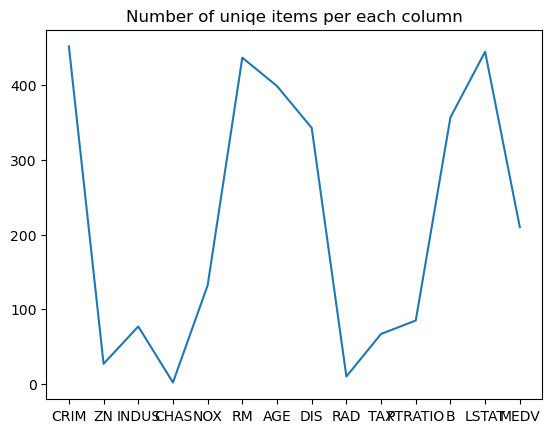

In [5]:
#Q3

plt.plot(df.nunique())
plt.title('Number of uniqe items per each column')
plt.show()

Q4:<br>
The correlation matrix is shown as below. The points in which we have a value that is closer to 1 or -1 is concered of a much more related pair of columns.For example TAX and CRIM has so much affect on each other. But ZN and AGE are labeled as not really related.

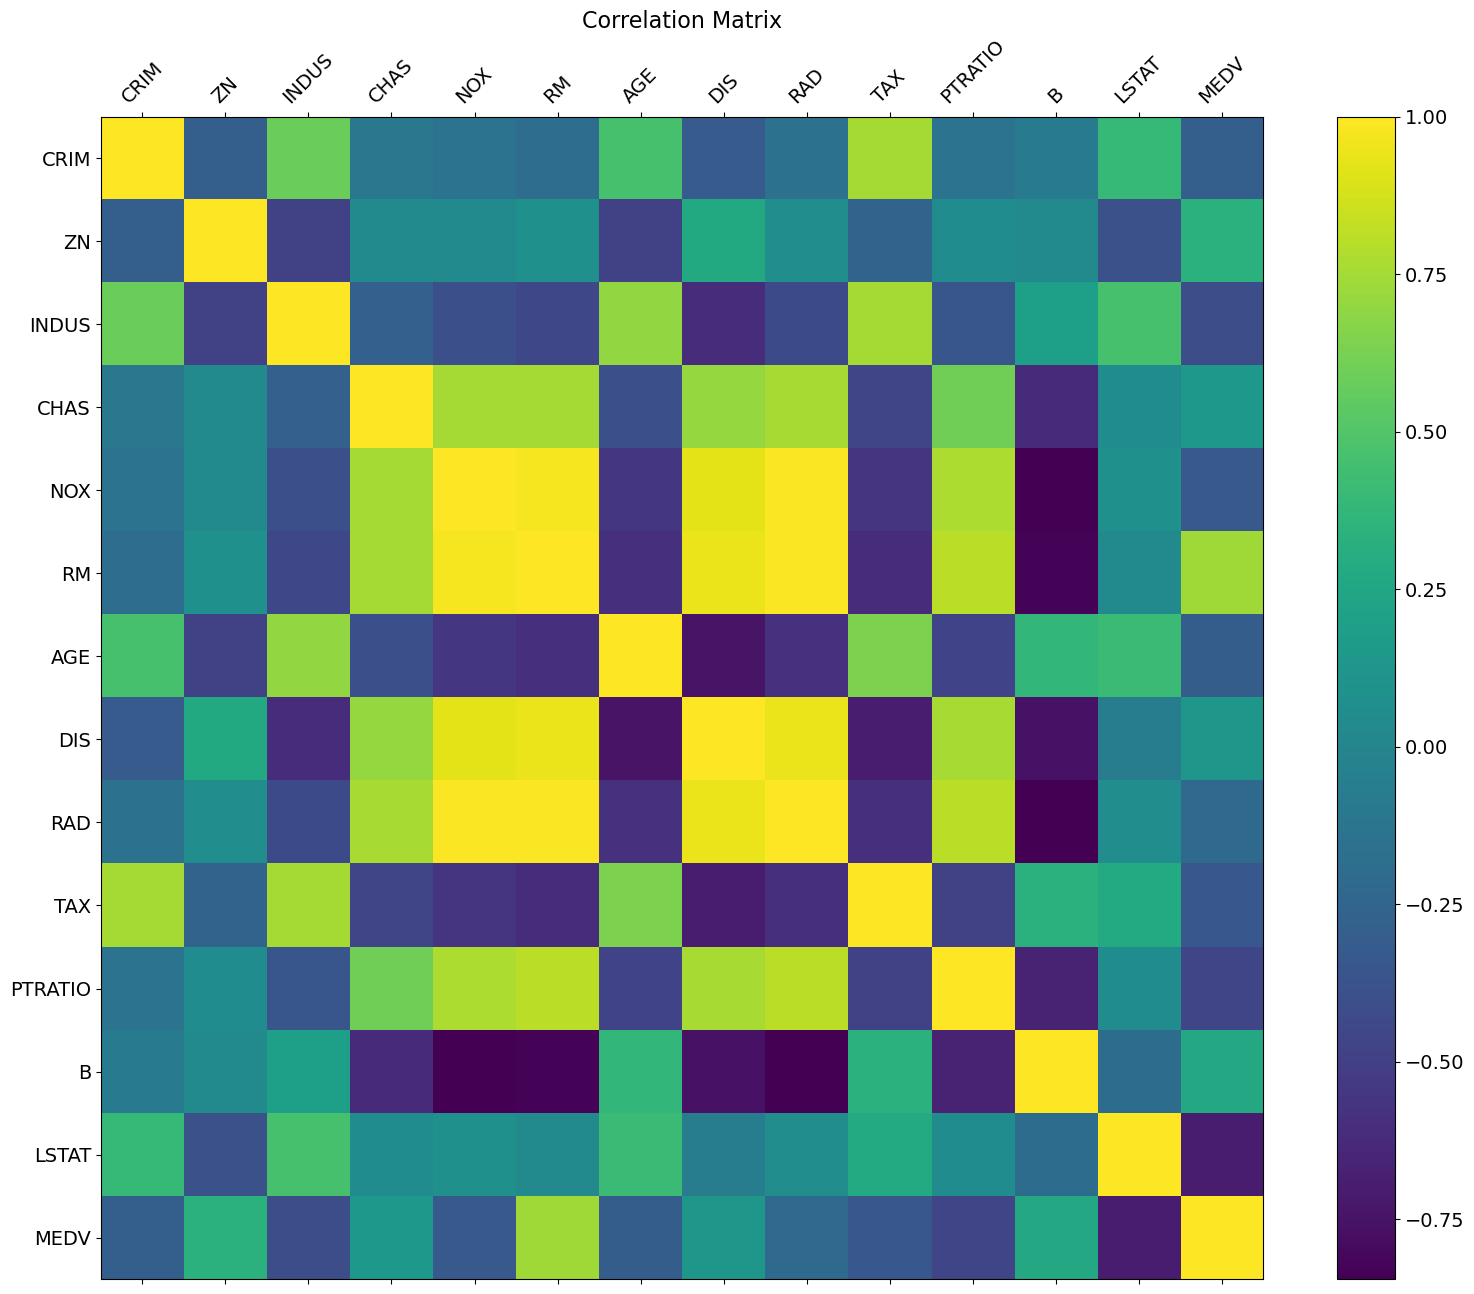

In [6]:
# Q4

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Q5:<br>
In the scatter plot or hexbin plots we can see that our data has a positive correlation or negative or zero. If the plot is ascending then there is positive corr,if it is descending there is negative corr and if it is kinda fixed there is zero corr.


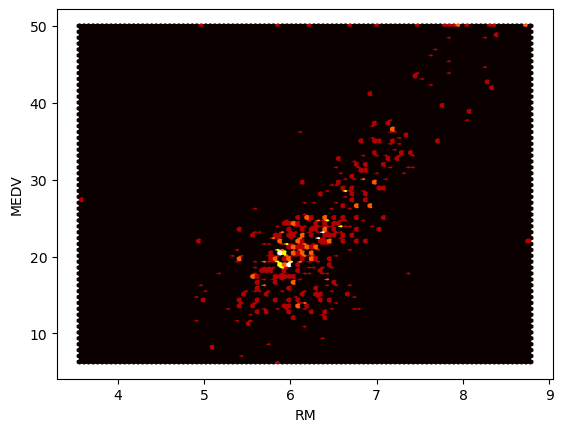

In [7]:
plt.hexbin(df['RM'],df['MEDV'],cmap='hot')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

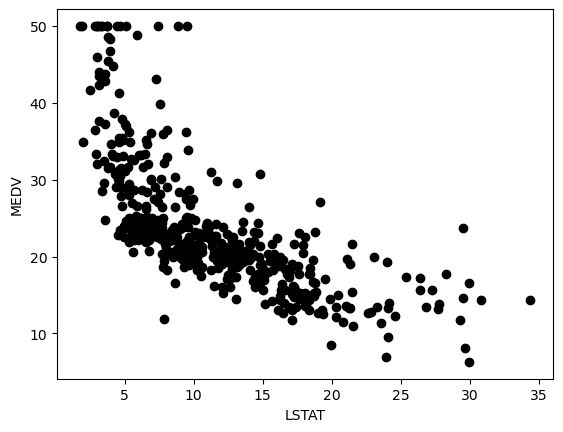

In [8]:
plt.scatter(df['LSTAT'],df['MEDV'],color='black')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

Q6:<br>
There are several ways to analyze data.<br>
1.`Descriptive`: showing mean,median,std and etc
2. `Data visualisation`: plots, charts and graphs
For example if there is a column with numerical data we can convert it to str and then show th violin plot to visualise the data.

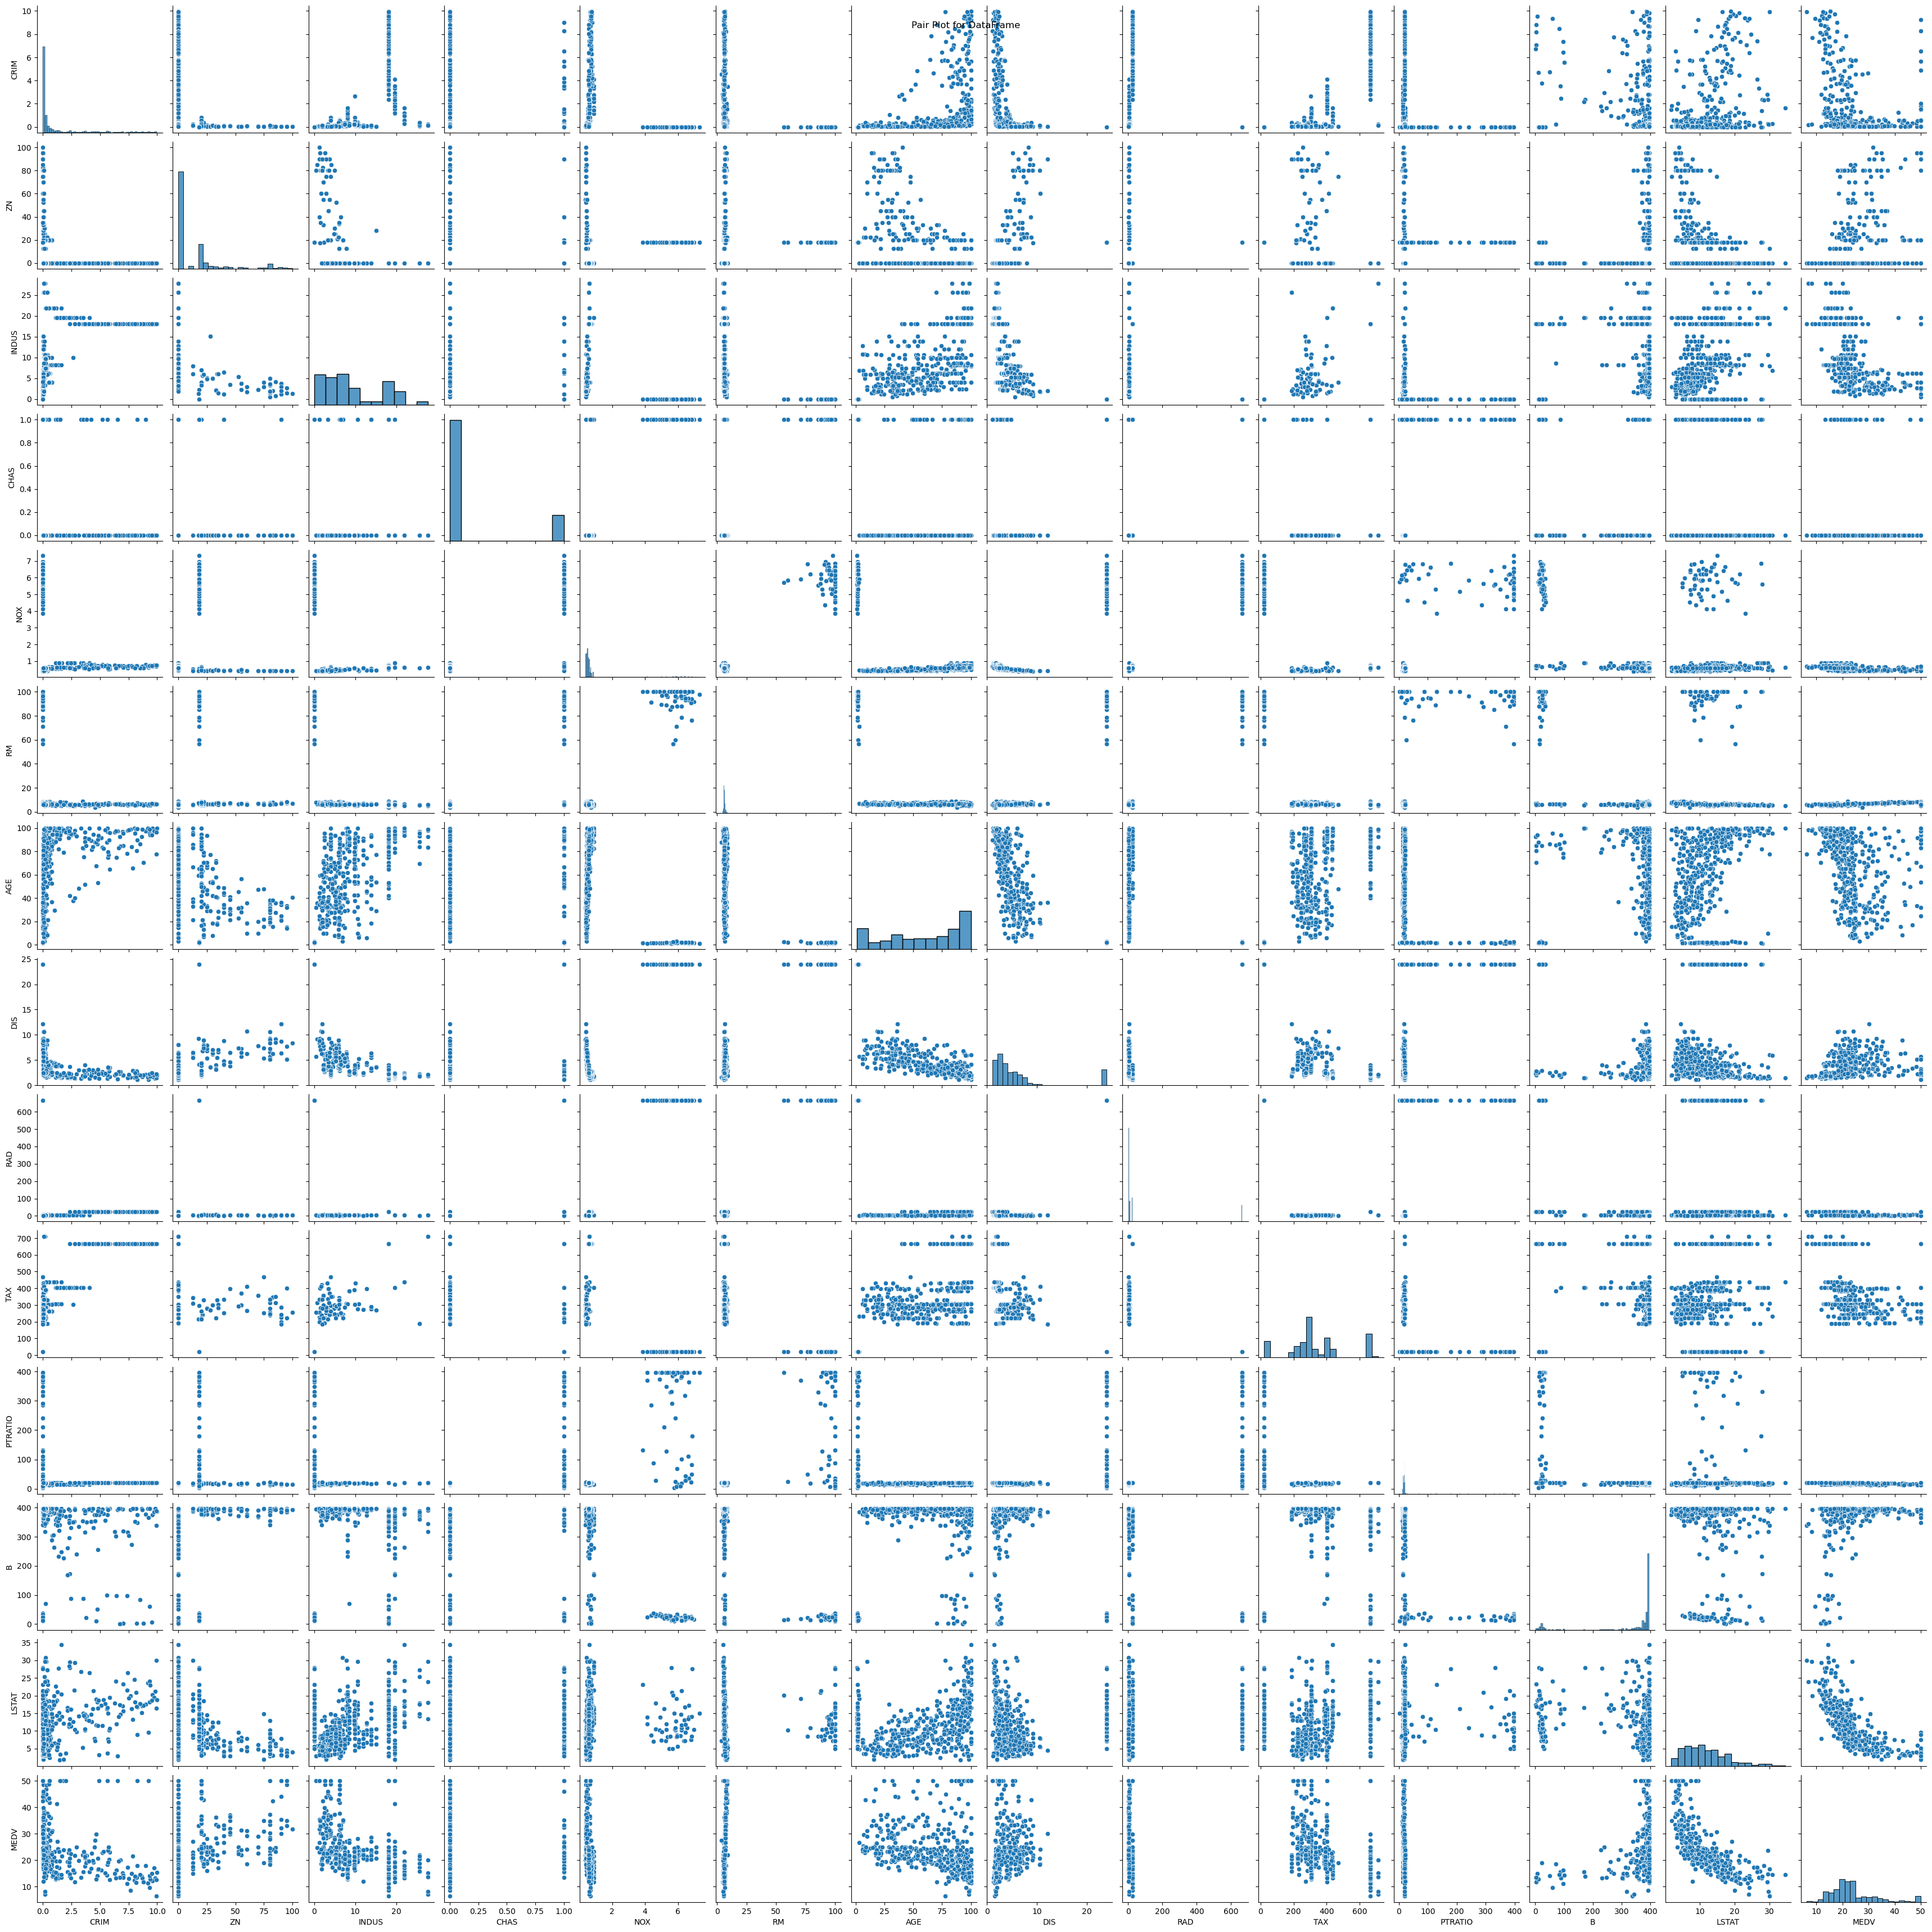

In [9]:
# Q6
sns.pairplot(df)
plt.suptitle('Pair Plot for DataFrame')
plt.show()

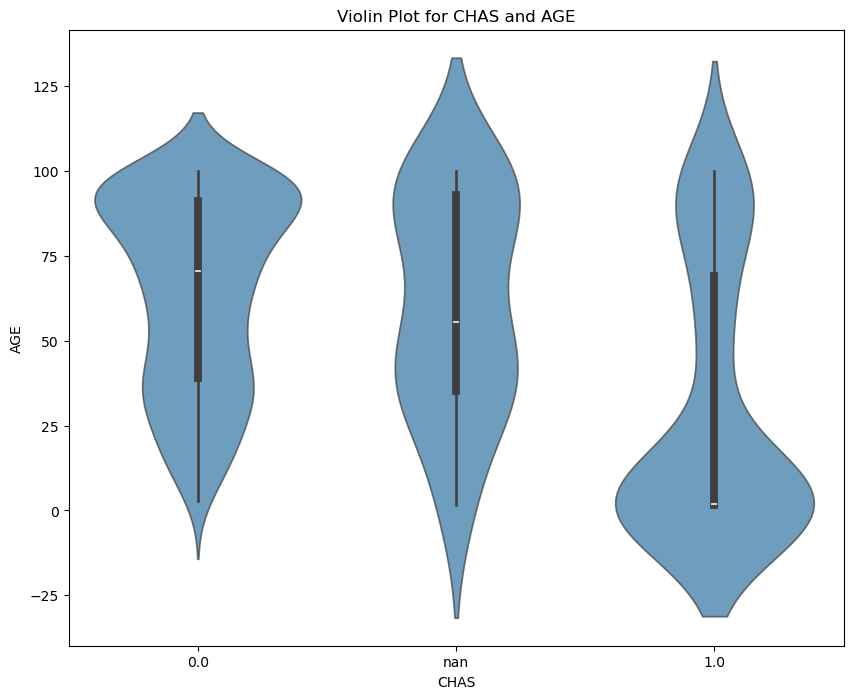

In [10]:
df['CHAS'] = df['CHAS'].astype(str)  # Convert 'quality' to categorical
plt.figure(figsize=(10, 8))
sns.violinplot(x="CHAS", y="AGE", data=df, alpha=0.7)
plt.title('Violin Plot for CHAS and AGE')
plt.xlabel('CHAS')
plt.ylabel('AGE')
plt.show()

In [27]:
#Q7

#deleting rows - missed vales
dataframe = df.dropna(axis=0)
print(dataframe.isnull().sum())
#Mean - missed value
# df["B"] = df["B"].replace(np.NaN, df["B"].mean())
# print(df["B"])

# #Mode - missed value
#replace with most common value in dataset
# df['DIS'] = df['DIS'].replace(np.NaN, statistics.mode(df['DIS']))
# print(df["DIS"][10:20])
print(dataframe.info())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     415 non-null    float64
 1   ZN       415 non-null    float64
 2   INDUS    415 non-null    float64
 3   CHAS     415 non-null    object 
 4   NOX      415 non-null    float64
 5   RM       415 non-null    float64
 6   AGE      415 non-null    float64
 7   DIS      415 non-null    float64
 8   RAD      415 non-null    int64  
 9   TAX      415 non-null    float64
 10  PTRATIO  415 non-null    float64
 11  B        415 non-null    float64
 12  LSTAT    415 non-null    float64
 13  MEDV     415 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 48.6+ KB
None


removing rows<br>
Pros: after removing missed data, the model becomes robust

Cons: Loss of data, which may be important too. If you have more missing data then efficiency won’t be good for modelling.

mean replacing
Cons: Works only with numerical datasets and failed in covariance between the independent variables


In [12]:
# Q8
# deleting columns with nan datas

# df.dropna(axis=1,inplace=True)
'MEDV' in df.columns

True

Q9:<br>
`Numerical data, as the name implies, refers to numbers. Categorical data is everything else. Categorical data is non-numerical information that is divided into groups. As its name suggests, categorical data describes categories or groups.`<br>
`All the variables are numerical except the the CHAS and maybe RAD.Because these two variables are not numerical and just catogarise data like str.`

In [13]:
# Q10
# data normalization
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(dataframe)
scaled_df = pd.DataFrame(d, columns=dataframe.columns)
scaled_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.099449,0.405034
1,0.002107,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.226744,0.350114
2,0.002105,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.070379,0.649886
3,0.006298,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.110159,0.684211
4,0.002362,0.00,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.106487,0.512586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,0.005653,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.242962,0.368421
411,0.003911,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.224908,0.327231
412,0.005466,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.119645,0.402746
413,0.010368,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.145349,0.359268


In [14]:
#standardisation


# copy of datasets
# stand = df.copy()

# # numerical features
# num_cols = df.columns

# # apply standardization on numerical features
# for i in num_cols:
    
#     # fit on training data column
#     scale = StandardScaler().fit(stand[[i]])
    
#     # transform the training data column
#     stand[i] = scale.transform(stand[[i]])
    
#     # transform the testing data column
#     stand[i] = scale.transform(stand[[i]])
# stand

Q10:<br>
Yes we need to do the normalisation or standardisation because in linear regression we need the valuse to have the same scale.

Q11:<br>
`We don't need to do anythoing because our data are lableled in numerical way.`

In [29]:
# Q12 Q13

designated_feature_list = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'] # ToDo

X = scaled_df.loc[:, designated_feature_list]
y = scaled_df.loc[:, ['MEDV']]

# X = stand.loc[:, designated_feature_list]
# y = stand.loc[:, ['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Q13:<br>
`The train-test-validation split helps assess how well a machine learning model will generalize to new, unseen data. It also prevents overfitting, where a model performs well on the training data but fails to generalize to new instances. By using a validation set, practitioners can iteratively adjust the model’s parameters to achieve better performance on unseen data.<br>
In classification, the data is split into two parts: training and testing sets. The model is trained on a training set, and its performance is examined on a testing set. The training set contains 80% of the data, whereas the test set contains 20%.`

Q14:<br>
`Supervised machine learning is generally used to classify data or make predictions, whereas unsupervised learning is generally used to understand relationships within datasets. Supervised machine learning is much more resource-intensive because of the need for labelled data`.<br>
`While Reinforcement Learning (RL) focuses on dynamic decision processes using Q-learning, Markov Decision Process, Machine Learning (ML) is versatile and can be applied to various tasks like image classification, speech recognition, and data analysis that may not involve sequential actions or rewards.`<br><br>
Q15:<br>
`A regression is a statistical technique that relates a dependent variable to one or more independent (explanatory) variables. A regression model is able to show whether changes observed in the dependent variable are associated with changes in one or more of the explanatory variables.Clustering is an example of an unsupervised learning algorithm, in contrast to regression and classification, which are both examples of supervised learning algorithms.`<br><br>
Q16:<br>
`Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.`<br><br>
Q17:<br>
`We need to choose the variable with the most absolout value of corr. I chose RM and LSTAT for this concept.`<br><br>

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [16]:
def linear_regression(input, output):
  mx , my = input.mean() , output.mean()
  numer , denom = 0.0 , 0.0
  for i in range(len(input)):
    numer += (input[i] - mx)*(output[i] - my)
    denom += (input[i] - mx)*(input[i] - mx)
  slope = numer / denom
  intercept = my - mx * slope
  return slope , intercept

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [17]:
def get_regression_predictions(input, intercept, slope):
    predictions = []
    for i in range(len(input)):
        predictions.append( slope * input[i] + intercept)
    return predictions

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [18]:
from math import sqrt
def get_root_mean_square_error(predicted_values, actual_values):
  sum = 0
  rmse = 0
  n = len(predicted_values)
  for i in range(n):
    sum += (predicted_values[i] - actual_values[i]) ** 2
  rmse = sqrt(sum / n)
  return rmse

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [19]:
def get_r2_score(predicted_values, actual_values):
  n = len(predicted_values)
  ss_tot , ss_res = 0 , 0
  for i in range(n):
    ss_tot += (actual_values[i] - actual_values.mean()) ** 2
    ss_res += (actual_values[i] - predicted_values[i]) ** 2
  r2 = 1 - (ss_res/ss_tot)
  return r2

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

rmse: 0.1583428849479305
r2: 0.46921459298445145


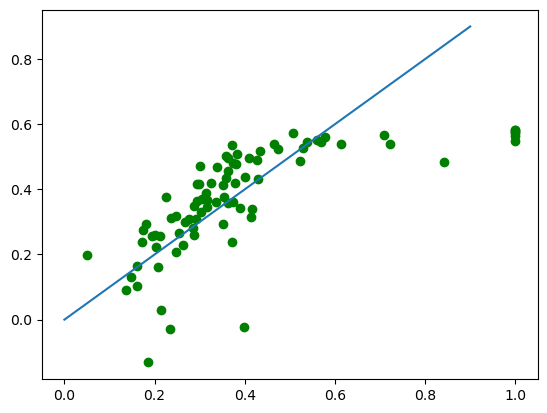

In [20]:
m , c = linear_regression(X_train['LSTAT'].to_numpy(),y_train.to_numpy())
predictions = get_regression_predictions(X_test['LSTAT'].to_numpy(),c,m)
rmse = get_root_mean_square_error(np.array(predictions),y_test.to_numpy())
r2 = get_r2_score(np.array(predictions),y_test.to_numpy())
print(f"rmse: {rmse}\nr2: {r2[0]}")
plt.scatter(y_test,predictions,color="green")

x = np.arange(0, 1, 0.1)
plt.plot(x,x)
plt.show()

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [21]:
def polynomial_regression(x, y, degree):
    degree = np.dot(np.linalg.inv(np.dot(x.T,x)),x.T) 

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [22]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [23]:
# Utility functions for multiple regression

# def normalize_features(chosen_features, data_frame):
#     for feature in chosen_features:
#         data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
#     return data_frame

# def predict_output(feature_matrix, weights, bias):
#     return sum([weights[i] * x**i for i in range(len(W))])
#     return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [24]:
# def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
#     weights = np.array(initial_weights)

#     while True:
#         # Compute predictions using polynomial function and errors
#         #TO DO

#         # Compute derivatives for all weights
#         #TO DO

#         # Update weights and bias
#         #TO DO

#         # Check convergence
#         #TO DO

#     return weights, bias

In [25]:

# def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
#     initial_weights = keywords['initial_weights']
#     step_size = keywords['step_size']
#     tolerance = keywords['tolerance']
#     bias = keywords['bias']
#     weights = np.array(initial_weights)
#     weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

#     return weights, bias

# def get_weights_and_bias(chosen_features):

#     keywords = {
#         'initial_weights': np.array([.5]*len(chosen_features)),
#         'step_size': 1.e-4,
#         'tolerance': 1.e-10,
#         'bias': 0
#     }

#     # TO DO

#     return chosen_feature_matrix, train_weights, bias

# KNN and desicion tree

Q21:<br>
`Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.`

Pros:<br>
`Decision tree pruning reduces the risk of overfitting by removing overgrown subtrees that do not improve the expected accuracy on new data.`<br>
Cons:<br>
`As the pruning is reducing the set of rules as well as the size of the tree, the probability of improvement in performance is, therefore high. While on the other side, the pruning may eliminate the interesting information which can lead to reducing the accuracy.`


Q22:<br>
`Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits.`
Trees are easy to interpret and visualize.
Decision trees can learn complex statistical models using a variety of kernel functions.
Trees are naturally resistant to overfitting.
Trees often require less preprocessing of data

Q23:<br>
`KNN is a non-parametric model, where LR is a parametric model. KNN is comparatively slower than Logistic Regression. KNN supports non-linear solutions where LR supports only linear solutions. LR can derive confidence level (about its prediction), whereas KNN can only output the label.KNN, or K-Nearest Neighbors, is a non-parametric algorithm that classifies new data points based on their proximity to previously labeled data points. On the other hand, classification by neural networks involves the utilization of interconnected layers of artificial neurons to identify patterns and make predictions.`

Q24:<br>
`The 1-N-N classifier is one of the oldest methods known. The idea is ex- tremely simple: to classify X find its closest neighbor among the training points (call it X ,) and assign to X the label of X .`

Q25:<br>
`To classify an unknown instance represented by some feature vectors as a point in the feature space, the k-NN classifier calculates the distances between the point and points in the training data set. Usually, the Euclidean distance is used as the distance metric.............................................Manhattan Distance – This distance is also known as taxicab distance or city block distance, that is because the way this distance is calculated. The distance between two points is the sum of the absolute differences of their Cartesian coordinates.............................................................Cosine Distance – This distance metric is used mainly to calculate similarity between two vectors. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in the same direction. It is often used to measure document similarity in text analysis. When used with KNN this distance gives us a new perspective to a business problem and lets us find some hidden information in the data which we didn’t see using the above two distance matrices.`

In [31]:
# Q26

X = scaled_df.loc[:, designated_feature_list]
y = scaled_df.loc[:, ['MEDV']]
ys = sorted(y.to_numpy())
new = []
new.append(ys[:len(ys) * 2 // 10])
new.append(ys[len(ys) * 2 // 10:len(ys) * 8 // 10])

new.append(ys[len(ys) * 8 // 10:])
y = y.to_numpy()
for i in range(len(y)):
    if y[i] in new[0]:
        y[i] = 0
    elif y[i] in new[1]:
        y[i] = 1
    else:
        y[i] = 2
X = scaled_df.loc[:, designated_feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.2)

classifier = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(f"accuracy: {ac}")
print(f"confusion matrix:\n{cm}")

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

dtree = DecisionTreeClassifier(max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_test)
dtree = dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7848101265822784

In [ ]:

knn_params = [{'n_neighbors': list(range(1,10)),'metric':['euclidean', 'manhattan', 'minkowski']}]
rfc = KNeighborsClassifier()
clf = GridSearchCV(rfc, knn_params, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train.ravel())
print(clf.best_params_)
print(clf.best_score_)

desicion_params = [{'max_depth': list(range(1,5)),'max_leaf_nodes':list(range(2,10)),'max_features':list(range(1,5))}]
rfc2 = DecisionTreeClassifier()
clf2 = GridSearchCV(rfc2,desicion_params,cv = 5,scoring = 'accuracy')
clf2.fit(X_train, y_train.ravel())
print(clf2.best_params_)
print(clf2.best_score_)

{'metric': 'euclidean', 'n_neighbors': 1}
0.8206349206349207
{'max_depth': 3, 'max_features': 2, 'max_leaf_nodes': 5}
0.8205837173579109


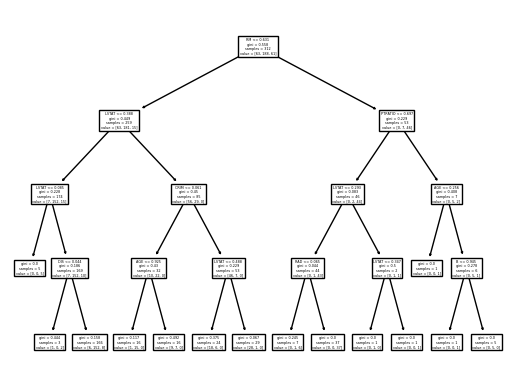

In [ ]:
# Q28

tree.plot_tree(dtree, feature_names=designated_feature_list,max_depth=4)
plt.show()

Q29:<br>
Overfitting models produce good predictions for data points in the training set but perform poorly on new samples. Underfitting occurs when the machine learning model is not well-tuned to the training set. The resulting model is not capturing the relationship between input and output well enough.

# Ensemble methods
Q30:<br>
`Ensemble learning is an approach in which two or more models are fitted to the same data, and the predictions of each model are combined. Ensemble learning aims to achieve better performance with the ensemble of models than with any individual model.`<br><br>
Q31:<br>
`Bagging and boosting are different ensemble techniques that use multiple models to reduce error and optimize the model. The bagging technique combines multiple models trained on different subsets of data, whereas boosting trains the model sequentially, focusing on the error made by the previous model.Bagging: Reduces variance by averaging predictions from models trained on different subsets of data. Boosting: Reduces bias by sequentially training models that focus on errors of previous models.`<br><br>
Q32:<br>
`Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance in the final model.`<br><br>
Q33:<br>
`This process involves drawing random samples from the original dataset. Through bootstrapping you are simply taking samples over and over again from the same group of data (your sample data) to estimate how accurate your estimates about the entire population (what really is out there in the real world) is.`<br><br>
Q34:<br>
`The number of trees needed in the Random Forest depends on the number of rows in the data set.They suggest that a random forest should have a number of trees between 64 - 128 trees. With that, you should have a good balance between ROC AUC and processing time.`<br><br>
Q35:<br>
`Here’s presenting the times when random forest algorithms aren’t ideal.                      Extrapolation: It is not ideal in data extrapolation                                                  Sparse data: It doesn’t produce good results when it comes to sparse data                           Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems. Random forests are an ensemble method, meaning they combine predictions from other models. Each of the smaller models in the random forest ensemble is a decision tree.`<br><br>
Q36:<br>
`It reduses the variance. One method to reduce the variance of a random forest model is to prune the individual trees that make up the ensemble. Pruning means cutting off some branches or leaves of the tree that have low importance or high complexity.`


In [ ]:
# Q37

model = RandomForestClassifier()
random_forest_params = [{'n_estimators':list(range(64,128))}]
models = GridSearchCV(model,random_forest_params,cv = 5,scoring = 'accuracy')
models.fit(X_train, y_train.ravel())
print(models.best_params_)
print(models.best_score_)

{'n_estimators': 72}
0.8813620071684587


Q38:<br>
A Gradient Boosting Decision Trees (GBDT) is a decision tree ensemble learning algorithm similar to random forest, for classification and regression. Ensemble learning algorithms combine multiple machine learning algorithms to obtain a better model.
Both random forest and GBDT build a model consisting of multiple decision trees. The difference is in how the trees are built and combined.
Both random forest and GBDT build a model consisting of multiple decision trees.

Q39:<br>
`Gradient boosting is a machine learning ensemble technique that combines the predictions of multiple weak learners, typically decision trees, sequentially. It aims to improve overall predictive performance by optimizing the model’s weights based on the errors of previous iterations, gradually reducing prediction errors and enhancing the model’s accuracy.A decision tree is a simple, decision making-diagram. Random forests are a large number of trees, combined (using averages or “majority rules”) at the end of the process. Gradient boosting machines also combine decision trees, but start the combining process at the beginning, instead of at the end.`

In [ ]:
# Q40

model = XGBClassifier()
xgb_params = [{'max_depth':list(range(4,6)),'min_child_weight':range(1,6,2)}]
models = GridSearchCV(model,xgb_params,cv = 5,scoring = 'accuracy')
models.fit(X_train, y_train)
print(models.best_params_)
print(models.best_score_)

{'max_depth': 4, 'min_child_weight': 3}
0.8428059395801331


# Support Vector Machine

In [ ]:
# Q41

# print(y_train)
model = SVC(kernel='rbf', C=1, gamma=1)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of SVM(rbf):', accuracy)

Accuracy of SVM(rbf): 0.810126582278481


In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train.ravel())
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of SVM(linear):", accuracy)


Accuracy of SVM(linear): 0.8987341772151899


rbf:
---
[[ 9  3  0]
 [ 6 43  5]
 [ 0  1 12]]
---


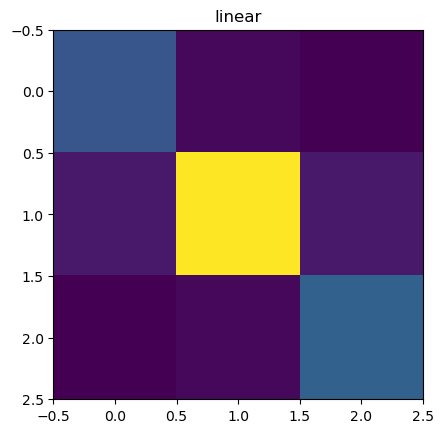

Precision(rbf):0.8231244064577398
Precision(linear):0.9129210658622423
Recall(rbf):0.740258656654151
Recall(linear):0.8603254067584482
f1(rbf):0.7727172717271727
f1(linear):0.8835034013605442


In [ ]:
# Q42
conf_mat = confusion_matrix(predictions,y_test)
print("rbf:\n---")
print(confusion_matrix(y_pred,y_test))
print("---")

plt.imshow(conf_mat)
plt.title("linear")
plt.show()

precision = precision_score(y_test, y_pred,average='macro')
print(f'Precision(rbf):{precision}')

precision2 = precision_score(y_test, predictions,average='macro')
print(f'Precision(linear):{precision2}')


recall = recall_score(y_test, y_pred,average='macro')
print(f'Recall(rbf):{recall}')

recall2 = recall_score(y_test, predictions,average='macro')
print(f'Recall(linear):{recall2}')


f1 = f1_score(y_test, y_pred,average='macro')
print(f'f1(rbf):{f1}')

f12 = f1_score(y_test, predictions,average='macro')
print(f'f1(linear):{f12}')

In [ ]:
def SVC_grid_search(s):
    model = SVC(kernel=s)
    svc_params = [{'C':list(range(1,10)),'gamma':range(1,10),'degree':[1,2,3]}]
    models = GridSearchCV(model,svc_params,cv = 5,scoring = 'accuracy')
    models.fit(X_train, y_train.ravel())
    print(models.best_params_)
    print(models.best_score_)

In [ ]:
SVC_grid_search("linear")
SVC_grid_search("rbf")

{'C': 4, 'degree': 1, 'gamma': 1}
0.8430619559651819
{'C': 9, 'degree': 1, 'gamma': 1}
0.839784946236559


# Analysing methods

`The ROC (Receiver Operating Characteristic) curve is like a graph that shows how good a model is at telling things apart. It helps us see how often the model correctly identifies positive things and how often it correctly avoids labeling negative things as positive. So, it basically shows how well the model is working for binary classification tasks.`<br>
Area under the curve (AUC)	Interpretation<br>
0.8 ≤ AUC < 0.9	Good<br>
0.7 ≤ AUC < 0.8	Fair<br>
0.6 ≤ AUC < 0.7	Poor<br>
0.5 ≤ AUC < 0.6	Fail<br>